In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import os
from dotenv import load_dotenv

In [71]:
load_dotenv('/Users/Nils/Desktop/Studies/Macro/Python Projects/Forecasting/FRED_API_KEY.env')    
api_key = os.getenv("FRED_API_KEY")
# Bodge fix to sort out next time
api_key=api_key.split("api_key=")[1].split('"')[0]

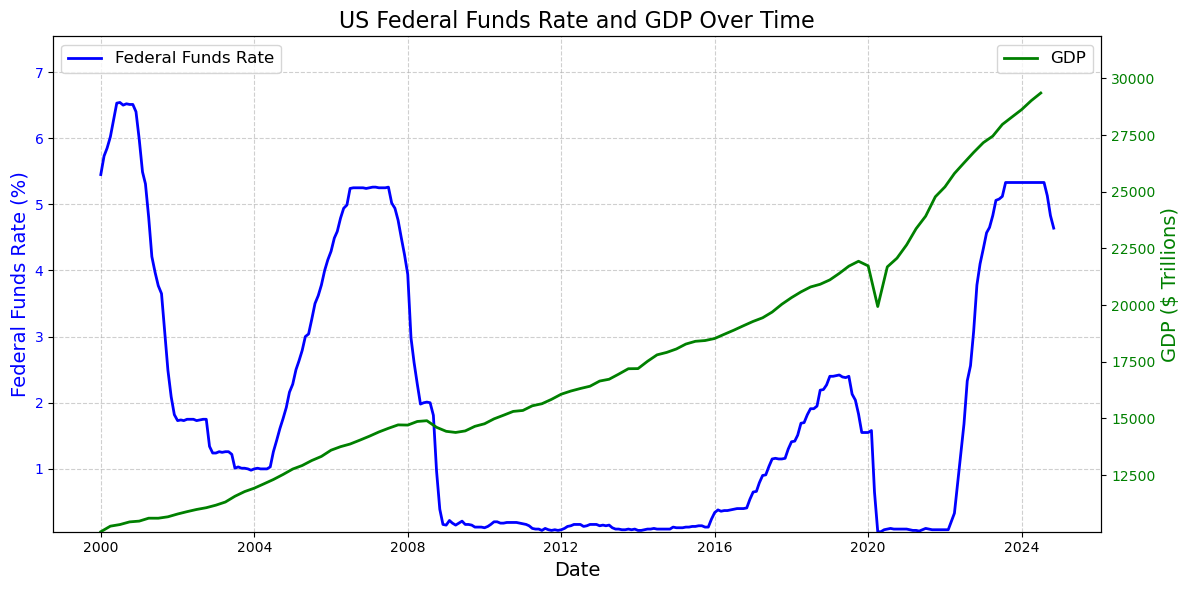

In [98]:
def get_api_key():
    """
    Retrieve the API key from the .env file using dotenv.
    """
    load_dotenv('/Users/Nils/Desktop/Studies/Macro/Python Projects/Forecasting/FRED_API_KEY.env')    
    api_key = os.getenv("FRED_API_KEY")
    # Bodge fix to sort out next time
    api_key=api_key.split("api_key=")[1].split('"')[0]
    if not api_key:
        raise ValueError("FRED_API_KEY not found in the environment.")
    return api_key

def fetch_fed_funds_data(api_key):
    """
    Little fetcher to get the fedfunds data from the FRED API
    """
    url = f"https://api.stlouisfed.org/fred/series/observations"
    params = {
        "series_id": "FEDFUNDS",
        "api_key": api_key,
        "file_type": "json",
        "observation_start": "2000-01-01", 
    }

    response = requests.get(url, params=params)
    response.raise_for_status()
    data = response.json()

    # Extract relevant data
    observations = data["observations"]
    fed_funds_df = pd.DataFrame(observations)
    fed_funds_df['date'] = pd.to_datetime(fed_funds_df['date'])
    fed_funds_df['value'] = pd.to_numeric(fed_funds_df['value'], errors='coerce')
    fed_funds_df.set_index('date', inplace=True)

    return fed_funds_df

def fetch_gdp_data(api_key):
    """
    same as above but for GDP
    """
    url = f"https://api.stlouisfed.org/fred/series/observations"
    params = {
        "series_id": "GDP",  
        "api_key": api_key,
        "file_type": "json",
        "observation_start": "2000-01-01"
    }

    response = requests.get(url, params=params)
    response.raise_for_status()
    data = response.json()

    # Extract relevant data
    observations = data["observations"]
    gdp_df = pd.DataFrame(observations)
    gdp_df['date'] = pd.to_datetime(gdp_df['date'])
    gdp_df['value'] = pd.to_numeric(gdp_df['value'], errors='coerce')
    gdp_df.set_index('date', inplace=True)

    return gdp_df

def plot_fedfunds_and_gdp(fed_funds_df, gdp_df):
    """
    Plots Federal Funds Rate and GDP data on two y-axes.
    """
    # Create the figure
    plt.figure(figsize=(12, 6))
    
    # Plot Federal Funds Rate (left y-axis)
    ax1 = plt.gca()  # Get the current axis for Federal Funds Rate
    ax1.plot(fed_funds_df.index, fed_funds_df['value'], label='Federal Funds Rate', color='blue', linewidth=2)
    ax1.set_xlabel('Date', fontsize=14)
    ax1.set_ylabel('Federal Funds Rate (%)', fontsize=14, color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_ylim(fed_funds_df['value'].min(), fed_funds_df['value'].max() + 1)
    
    # Create a second y-axis for GDP (right y-axis)
    ax2 = ax1.twinx()  # Create twin axes sharing the same x-axis
    ax2.plot(gdp_df.index, gdp_df['value'], label='GDP', color='green', linewidth=2)
    ax2.set_ylabel('GDP ($ Trillions)', fontsize=14, color='green')
    ax2.tick_params(axis='y', labelcolor='green')
    ax2.set_ylim(gdp_df['value'].min(), gdp_df['value'].max() + 2500)


    # Add titles and grid
    plt.title('US Federal Funds Rate and GDP Over Time', fontsize=16)
    ax1.grid(True, linestyle='--', alpha=0.6)
    
    # Add legends
    ax1.legend(loc='upper left', fontsize=12)
    ax2.legend(loc='upper right', fontsize=12)

    # Tight layout to avoid overlap
    plt.tight_layout()

    
    plt.savefig('plot.png', dpi=300)

    
    # Show the plot
    plt.show()
    


def main():
    api_key=get_api_key()
    try:
        fed_funds_df = fetch_fed_funds_data(api_key)
        gdp_df = fetch_gdp_data(api_key)

        plot_fedfunds_and_gdp(fed_funds_df, gdp_df)

    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == "__main__":
    main()